In [2]:
import os
import sys
import time
import datetime
import netCDF4
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.cluster import DBSCAN

In [2]:
request_amalthee = ['SENTINEL2A_20170429-143808-887_L2A_T20LKQ_D_V1-4',
 'SENTINEL2B_20171210-144420-920_L2A_T20LKQ_D_V1-4',
 'SENTINEL2A_20170923-143400-056_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20180926-144457-003_L2A_T20LKQ_D_V1-9',
 'SENTINEL2B_20181026-143749-456_L2A_T20LKQ_D_V1-9',
 'SENTINEL2A_20190708-144533-531_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20210423-144522-774_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20200106-143524-756_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20190812-144531-488_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20190901-144528-103_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20180906-144041-453_L2A_T20LLQ_D_V1-9',
 'SENTINEL2A_20160908-142751-463_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20160305-144316-026_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20190218-144524-711_L2A_T20LKQ_D_V1-9',
 'SENTINEL2B_20180913-143445-570_L2A_T20LLQ_D_V1-9',
 'SENTINEL2A_20170628-143750-459_L2A_T20LKQ_D_V1-4',
 'SENTINEL2B_20180725-143000-004_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20171001-143857-043_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20190817-144531-369_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20180529-143748-456_L2A_T20LKQ_D_V1-8',
 'SENTINEL2A_20170705-142752-463_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20180429-143942-301_L2A_T20LKQ_D_V1-7',
 'SENTINEL2A_20191205-144522-569_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20170506-143305-393_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20190708-144529-878_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20180928-142850-461_L2A_T20LLQ_D_V1-9',
 'SENTINEL2A_20210408-144524-000_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20170327-142848-456_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20180531-143141-417_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20210108-144525-442_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20190509-144532-303_L2A_T20LKQ_C_V2-0',
 'SENTINEL2B_20190124-144525-386_L2A_T20LKQ_D_V1-9',
 'SENTINEL2A_20190906-144527-774_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20191125-144528-570_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20200709-143533-908_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20180901-144030-421_L2A_T20LLQ_D_V1-9',
 'SENTINEL2B_20190822-144529-987_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20180228-143743-457_L2A_T20LKQ_D_V1-5',
 'SENTINEL2B_20190424-144535-288_L2A_T20LKQ_C_V2-0',
 'SENTINEL2A_20200808-143535-815_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20180906-144041-453_L2A_T20LKQ_D_V1-9',
 'SENTINEL2B_20180509-144456-181_L2A_T20LKQ_D_V1-7',
 'SENTINEL2B_20200925-144527-443_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20180628-143912-045_L2A_T20LKQ_D_V1-8',
 'SENTINEL2B_20171210-144420-920_L2A_T20LLQ_D_V1-4',
 'SENTINEL2B_20190315-144526-211_L2A_T20LKQ_C_V2-0',
 'SENTINEL2B_20201101-143532-537_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20180730-142753-458_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20170827-143747-456_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20190802-144536-257_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20181028-142749-457_L2A_T20LLQ_D_V1-9',
 'SENTINEL2B_20191028-143530-732_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20170802-143805-893_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20200803-143532-956_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20190203-144525-105_L2A_T20LLQ_D_V1-9',
 'SENTINEL2A_20180802-144029-810_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20190723-144533-293_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20200910-144528-455_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20170718-143752-456_L2A_T20LKQ_D_V1-8',
 'SENTINEL2B_20190613-144531-993_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20200811-144534-386_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20180814-142928-149_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20200124-144518-062_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20201010-144530-605_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20191013-143532-740_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20180529-143748-456_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20200508-144526-440_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20200326-143527-660_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20180628-143912-045_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20190807-144528-863_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200922-143532-162_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20190916-144524-037_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200119-144527-003_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20180424-144513-606_L2A_T20LKQ_D_V1-7',
 'SENTINEL2A_20190618-144529-787_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20180715-143142-028_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20161217-143109-158_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20180812-143931-084_L2A_T20LKQ_D_V1-8',
 'SENTINEL2A_20180710-143018-773_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20160710-142756-462_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20160723-143750-457_L2A_T20LLQ_D_V1-4',
 'SENTINEL2B_20180330-144453-177_L2A_T20LKQ_D_V1-7',
 'SENTINEL2A_20170615-142753-459_L2A_T20LLQ_D_V1-4',
 'SENTINEL2B_20171207-142842-463_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20190419-144531-306_L2A_T20LKQ_C_V2-0',
 'SENTINEL2B_20200617-144530-912_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20191031-144525-409_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200627-144530-860_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20210428-144521-950_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20200503-144528-232_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20210602-144525-694_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20191130-144519-905_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20180822-144505-605_L2A_T20LKQ_D_V1-8',
 'SENTINEL2A_20200719-143534-931_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20191105-144531-303_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20190713-144533-579_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20190916-144527-686_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20200129-144520-698_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20210123-144524-748_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20210405-143526-149_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20180511-142856-464_L2A_T20LLQ_D_V1-7',
 'SENTINEL2B_20200119-144525-371_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20191003-143531-823_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20180409-144303-336_L2A_T20LKQ_D_V1-7',
 'SENTINEL2B_20181016-144503-609_L2A_T20LLQ_D_V1-9',
 'SENTINEL2A_20170718-143752-456_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20170129-144458-396_L2A_T20LLQ_D_V1-4',
 'SENTINEL2B_20200727-144529-505_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20190628-144533-021_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20190516-143533-580_L2A_T20LLQ_C_V2-1',
 'SENTINEL2A_20180921-143853-616_L2A_T20LKQ_D_V1-9',
 'SENTINEL2A_20190807-144532-512_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20170822-143810-108_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20170228-144505-609_L2A_T20LKQ_D_V1-4',
 'SENTINEL2A_20200917-143534-400_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20190124-144530-417_L2A_T20LLQ_D_V1-9',
 'SENTINEL2A_20201020-144533-902_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20190814-143533-148_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20180305-143748-457_L2A_T20LLQ_D_V1-6',
 'SENTINEL2A_20191125-144524-922_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20200920-144533-346_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20190610-143537-389_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20180608-144455-179_L2A_T20LLQ_D_V1-7',
 'SENTINEL2A_20180921-143853-616_L2A_T20LLQ_D_V1-9',
 'SENTINEL2B_20201005-144528-331_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20190630-143538-387_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20190414-144533-651_L2A_T20LKQ_C_V2-0',
 'SENTINEL2A_20210528-144529-227_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20160404-144137-008_L2A_T20LKQ_D_V1-4',
 'SENTINEL2B_20190414-144530-003_L2A_T20LLQ_C_V2-0',
 'SENTINEL2A_20210408-144520-359_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20160901-143746-461_L2A_T20LLQ_D_V1-4',
 'SENTINEL2B_20200905-144531-328_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20200528-144529-677_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20180228-143743-457_L2A_T20LLQ_D_V1-5',
 'SENTINEL2B_20190911-144525-712_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200329-144522-363_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20171001-143857-043_L2A_T20LKQ_D_V1-8',
 'SENTINEL2A_20160723-143750-457_L2A_T20LKQ_D_V1-4',
 'SENTINEL2B_20200205-143523-755_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200816-144528-326_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20201007-143535-644_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20161018-143021-499_L2A_T20LLQ_D_V1-4',
 'SENTINEL2B_20191008-143530-868_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20200413-144527-482_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20180106-142845-456_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20180613-143848-183_L2A_T20LKQ_D_V1-8',
 'SENTINEL2A_20190228-144519-976_L2A_T20LLQ_C_V2-0',
 'SENTINEL2A_20201017-143535-453_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200617-144527-265_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20180908-143047-244_L2A_T20LLQ_D_V1-9',
 'SENTINEL2A_20200530-143535-943_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200627-144527-215_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20180723-143747-459_L2A_T20LKQ_D_V1-8',
 'SENTINEL2A_20180610-142853-459_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20160819-142755-462_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20190618-144536-529_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20210326-143527-993_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20180718-143744-459_L2A_T20LKQ_D_V1-8',
 'SENTINEL2A_20171122-142850-463_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20200930-144530-437_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20170126-142912-711_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20201129-144528-593_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20181008-142749-461_L2A_T20LLQ_D_V1-9',
 'SENTINEL2B_20190901-144531-741_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20191217-143524-661_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20180809-143005-944_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20180807-143756-888_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20170725-142754-460_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20161227-143413-156_L2A_T20LLQ_D_V1-4',
 'SENTINEL2B_20180728-143743-463_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20180315-144453-175_L2A_T20LLQ_D_V1-6',
 'SENTINEL2B_20190812-144535-130_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20180218-144450-173_L2A_T20LLQ_D_V1-5',
 'SENTINEL2A_20201010-144534-259_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20200405-143526-885_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20170608-143753-456_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20181220-144519-878_L2A_T20LKQ_D_V1-9',
 'SENTINEL2A_20170916-143942-520_L2A_T20LLQ_D_V1-4',
 'SENTINEL2B_20201121-143530-350_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20180524-144158-787_L2A_T20LLQ_D_V1-7',
 'SENTINEL2A_20210508-144523-754_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200826-144528-209_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200116-143523-978_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20201114-144529-272_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20190804-143534-193_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20180812-143931-084_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20190509-144528-652_L2A_T20LLQ_C_V2-0',
 'SENTINEL2A_20200609-143536-090_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20171006-144211-434_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20170802-143805-893_L2A_T20LKQ_D_V1-8',
 'SENTINEL2B_20210503-144525-215_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20171028-143300-550_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20191105-144527-651_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20180703-144051-455_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20181031-144454-179_L2A_T20LKQ_D_V1-9',
 'SENTINEL2A_20210508-144527-407_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20210518-144524-992_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20200619-143535-756_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20201109-144532-857_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20180426-143424-711_L2A_T20LLQ_D_V1-7',
 'SENTINEL2A_20181001-143743-458_L2A_T20LKQ_D_V1-9',
 'SENTINEL2B_20200505-143527-229_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20160703-143749-460_L2A_T20LKQ_D_V1-4',
 'SENTINEL2A_20210604-143530-683_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20181210-144516-413_L2A_T20LLQ_D_V1-9',
 'SENTINEL2A_20180524-144158-787_L2A_T20LKQ_D_V1-7',
 'SENTINEL2A_20200622-144530-557_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200905-144527-685_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20200430-143532-723_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20160613-143854-395_L2A_T20LKQ_D_V1-4',
 'SENTINEL2B_20190921-144524-187_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20180713-143747-458_L2A_T20LKQ_D_V1-8',
 'SENTINEL2A_20180623-143746-463_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20190615-143533-217_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20170720-142803-281_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20181031-144454-179_L2A_T20LLQ_D_V1-9',
 'SENTINEL2A_20190618-144534-858_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20180807-143756-888_L2A_T20LKQ_D_V1-8',
 'SENTINEL2A_20200831-144533-320_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20180119-143744-460_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20181117-143523-746_L2A_T20LLQ_D_V1-9',
 'SENTINEL2A_20200722-144530-113_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20180703-144051-455_L2A_T20LKQ_D_V1-8',
 'SENTINEL2A_20210528-144525-577_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20210123-144528-327_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20170807-143748-462_L2A_T20LKQ_D_V1-8',
 'SENTINEL2A_20160504-144136-532_L2A_T20LKQ_D_V1-4',
 'SENTINEL2A_20180421-142855-461_L2A_T20LLQ_D_V1-7',
 'SENTINEL2B_20200714-143531-297_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20190409-144530-043_L2A_T20LKQ_C_V2-0',
 'SENTINEL2A_20160204-144256-370_L2A_T20LKQ_D_V1-4',
 'SENTINEL2B_20210602-144529-343_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20161127-143137-746_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20180315-144453-175_L2A_T20LKQ_D_V1-7',
 'SENTINEL2B_20200727-144527-130_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20190703-144533-484_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200816-144531-966_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20190829-143533-782_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20190718-144533-615_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20200324-144521-045_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200119-144518-116_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20180802-144029-810_L2A_T20LKQ_D_V1-8',
 'SENTINEL2B_20180827-144309-378_L2A_T20LKQ_D_V1-8',
 'SENTINEL2A_20180911-143743-460_L2A_T20LLQ_D_V1-9',
 'SENTINEL2B_20200119-144520-255_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20201124-144528-638_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20190506-143533-704_L2A_T20LLQ_C_V2-0',
 'SENTINEL2B_20190723-144536-936_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20180625-142751-463_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20161210-144052-459_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20180723-143747-459_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20171130-143740-461_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20160921-143741-455_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20200831-144529-666_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200528-144526-030_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20181026-143749-456_L2A_T20LLQ_D_V1-9',
 'SENTINEL2B_20210423-144519-136_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20190710-143538-615_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20170628-143750-459_L2A_T20LLQ_D_V1-4',
 'SENTINEL2B_20180728-143743-463_L2A_T20LKQ_D_V1-8',
 'SENTINEL2B_20170918-143143-183_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20190529-144527-543_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20180305-143748-457_L2A_T20LKQ_D_V1-6',
 'SENTINEL2A_20160812-143749-464_L2A_T20LKQ_D_V1-4',
 'SENTINEL2B_20200607-144526-910_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20180824-142845-461_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20181001-143743-458_L2A_T20LLQ_D_V1-9',
 'SENTINEL2B_20200428-144520-409_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20201114-144525-632_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200813-143533-363_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200727-144536-274_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20200717-144526-086_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20191018-143531-092_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20160812-143749-464_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20180829-143504-390_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20200925-144531-089_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20170519-143812-502_L2A_T20LKQ_D_V1-4',
 'SENTINEL2A_20200729-143535-574_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20190218-144521-068_L2A_T20LLQ_D_V1-9',
 'SENTINEL2A_20160921-143741-455_L2A_T20LKQ_D_V1-4',
 'SENTINEL2A_20170827-143747-456_L2A_T20LKQ_D_V1-8',
 'SENTINEL2B_20180708-144237-691_L2A_T20LKQ_D_V1-8',
 'SENTINEL2A_20180901-144030-421_L2A_T20LKQ_D_V1-8',
 'SENTINEL2A_20200801-144530-641_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20190526-143532-937_L2A_T20LLQ_C_V2-1',
 'SENTINEL2A_20180713-143747-458_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20160901-143746-461_L2A_T20LKQ_D_V1-4',
 'SENTINEL2A_20200930-144534-095_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20170903-142954-793_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20190911-144529-351_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20180819-142752-460_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20200806-144528-034_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20170409-143757-671_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20190628-144529-375_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20190730-143537-874_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20190824-143531-696_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20201002-143533-168_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20170205-143205-883_L2A_T20LLQ_D_V1-4',
 'SENTINEL2B_20190620-143537-758_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20190529-144531-186_L2A_T20LKQ_C_V2-1',
 'SENTINEL2A_20180613-143848-183_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20200902-143532-983_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20160524-143939-482_L2A_T20LLQ_D_V1-4',
 'SENTINEL2B_20200727-144534-697_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20201012-143533-558_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20160511-142859-456_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20180720-142754-462_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20190223-144523-831_L2A_T20LLQ_C_V2-0',
 'SENTINEL2B_20190908-143531-561_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20180718-143744-459_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20190613-144535-636_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20191107-143529-701_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20170526-142856-455_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20200907-143533-923_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20180506-142751-459_L2A_T20LLQ_D_V1-7',
 'SENTINEL2A_20190725-143534-792_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20190718-144529-966_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20190124-144532-119_L2A_T20LKQ_D_V1-9',
 'SENTINEL2A_20160204-144256-370_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20180504-144315-552_L2A_T20LLQ_D_V1-7',
 'SENTINEL2B_20180817-143740-459_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20180424-144513-606_L2A_T20LLQ_D_V1-7',
 'SENTINEL2A_20210518-144528-644_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20190401-143532-330_L2A_T20LLQ_C_V2-0',
 'SENTINEL2A_20200520-143535-340_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200624-143532-373_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20170409-143757-671_L2A_T20LKQ_D_V1-4',
 'SENTINEL2A_20190728-144533-259_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20170429-143808-887_L2A_T20LLQ_D_V1-4',
 'SENTINEL2B_20190325-144525-509_L2A_T20LLQ_C_V2-0',
 'SENTINEL2B_20200707-144530-395_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20210530-143530-565_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200823-143533-395_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20210108-144529-098_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20190625-143534-221_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20190903-143529-869_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200826-144531-851_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20191205-144526-214_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20180926-144457-003_L2A_T20LLQ_D_V1-9',
 'SENTINEL2A_20200510-143534-278_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20160421-142841-464_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20200910-144532-103_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20210420-143524-600_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20190918-143528-929_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200218-144520-899_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20190605-143531-867_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20160504-144136-532_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20181110-144523-527_L2A_T20LKQ_D_V1-9',
 'SENTINEL2B_20200218-144524-541_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20190921-144527-828_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20180903-143152-065_L2A_T20LLQ_D_V1-9',
 'SENTINEL2B_20180817-143740-459_L2A_T20LKQ_D_V1-8',
 'SENTINEL2A_20170519-143812-502_L2A_T20LLQ_D_V1-4',
 'SENTINEL2B_20200724-143532-096_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200912-143532-070_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20190322-143529-779_L2A_T20LLQ_C_V2-0',
 'SENTINEL2A_20160703-143749-460_L2A_T20LLQ_D_V1-4',
 'SENTINEL2B_20180708-144237-691_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20170822-143810-108_L2A_T20LKQ_D_V1-8',
 'SENTINEL2B_20210413-144521-008_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20181016-144503-609_L2A_T20LKQ_D_V1-9',
 'SENTINEL2A_20161130-143749-458_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20200927-143535-278_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20201216-143527-605_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20180330-144453-177_L2A_T20LLQ_D_V1-7',
 'SENTINEL2A_20170608-143753-456_L2A_T20LKQ_D_V1-4',
 'SENTINEL2A_20180121-142938-297_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20170416-142752-459_L2A_T20LLQ_D_V1-4',
 'SENTINEL2B_20180419-144456-173_L2A_T20LKQ_D_V1-7',
 'SENTINEL2B_20170829-143011-773_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20190802-144532-610_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20190126-143526-598_L2A_T20LLQ_D_V1-9',
 'SENTINEL2B_20180509-144456-181_L2A_T20LLQ_D_V1-7',
 'SENTINEL2B_20171130-143740-461_L2A_T20LKQ_D_V1-4',
 'SENTINEL2B_20170911-143831-579_L2A_T20LKQ_D_V1-8',
 'SENTINEL2A_20160730-142756-455_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20200413-144523-834_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20210306-143529-648_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20190618-144527-736_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20181110-144519-881_L2A_T20LLQ_D_V1-9',
 'SENTINEL2A_20200324-144524-689_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20170307-143353-118_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20201116-143532-986_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20191031-144529-050_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20180630-142840-359_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20200428-144524-052_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20201020-144530-251_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20190623-144532-935_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20190713-144537-225_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20190817-144527-716_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20160620-142754-459_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20200722-144533-763_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20190720-143535-144_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20190315-144522-571_L2A_T20LLQ_C_V2-0',
 'SENTINEL2A_20160613-143854-395_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20200324-144510-821_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20180620-142853-456_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20190116-143525-898_L2A_T20LLQ_D_V1-9',
 'SENTINEL2B_20200425-143524-728_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20210430-143525-796_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20190728-144529-608_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20210413-144524-649_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20170814-142956-794_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20190720-143541-369_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20180419-144456-173_L2A_T20LLQ_D_V1-7',
 'SENTINEL2B_20200418-144523-600_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20190310-144523-471_L2A_T20LKQ_C_V2-0',
 'SENTINEL2A_20191026-144531-742_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20180119-143744-460_L2A_T20LKQ_D_V1-4',
 'SENTINEL2A_20170218-143931-081_L2A_T20LLQ_D_V1-4',
 'SENTINEL2B_20190822-144533-627_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20180705-142751-458_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20180928-143512-885_L2A_T20LLQ_D_V1-9',
 'SENTINEL2B_20190623-144536-582_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20180918-143027-206_L2A_T20LLQ_D_V1-9',
 'SENTINEL2B_20191130-144523-538_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20161107-142906-894_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20160404-144137-008_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20170807-143748-462_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20200806-144531-673_L2A_T20LKQ_C_V2-2',
 'SENTINEL2B_20190809-143536-899_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20200818-143535-610_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20200811-144530-733_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20201201-143529-158_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20200801-144534-288_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20200131-143522-289_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200508-144522-798_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20190715-143535-020_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20180822-144505-605_L2A_T20LLQ_D_V1-8',
 'SENTINEL2B_20200126-143522-702_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20200418-144519-962_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20180827-144309-378_L2A_T20LLQ_D_V1-8',
 'SENTINEL2A_20160928-142947-515_L2A_T20LLQ_D_V1-4',
 'SENTINEL2B_20190703-144537-132_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20190913-143528-468_L2A_T20LLQ_C_V2-2',
 'SENTINEL2A_20180911-143743-460_L2A_T20LKQ_D_V1-9',
 'SENTINEL2A_20201219-144526-777_L2A_T20LKQ_C_V2-2',
 'SENTINEL2A_20190310-144519-823_L2A_T20LLQ_C_V2-0',
 'SENTINEL2A_20161117-142852-455_L2A_T20LLQ_D_V1-4',
 'SENTINEL2A_20180623-143746-463_L2A_T20LKQ_D_V1-8',
 'SENTINEL2B_20190424-144531-639_L2A_T20LLQ_C_V2-0',
 'SENTINEL2B_20190819-143535-556_L2A_T20LLQ_C_V2-2',
 'SENTINEL2B_20191110-144524-198_L2A_T20LLQ_C_V2-2']

In [3]:
s3bands = [
    'B1-400',
    'B2-412.5',
    'B3-442.5',
    'B4-490',
    'B5-510',
    'B6-560',
    'B7-620',
    'B8-665',
    'B9-673.75',
    'B10-681.25',
    'B11-708.75',
    'B12-753.75',
    'B16-778.75',
    'B17-865',
    'B18-885',
    'B21-1020'
]

def datafolder_2_list(path):
    return [f for f in path.iterdir() if f.suffix == '.csv']


def open_radiometry(path):
    old_names = [f'Oa{str(i).zfill(2)}_reflectance:float' for i in range(1, 22)]
    [old_names.remove(f'Oa{str(i).zfill(2)}_reflectance:float') for i in range(13,16)]
    [old_names.remove(f'Oa{str(i).zfill(2)}_reflectance:float') for i in range(19,21)]
    df = pd.read_csv(path).rename(columns={old_names[i]: s3bands[i] for i in range(16)})    
    return df


def normalize(df, bands, norm_band):
    df = df.copy()
    df[bands] = df[bands].to_numpy() - df[norm_band].to_numpy()[..., None]
    return df


def clip_negatives(df, bands, threshold=-0.1):
    return df.loc[~((df[bands] < -0.1).any(axis=1))]


def clean_radiometry(df, min_threshold=-0.1, norm_band='B21-1020'):

    if norm_band is not None:
        df = normalize(df, s3bands, 'B21-1020')

    df = clip_negatives(df, s3bands, -0.1)

    return df


def load_radiometries(path, min_pixels=10):

    csvs = [f for f in path.iterdir()]

    radiometries = {}

    for i, csv in enumerate(csvs):
        df = open_radiometry(csvs[i])
        if len(df) > min_pixels:
            radiometries[csv.stem[16:24]] = df
            
    return radiometries


def calc_nd_index(df, band1, band2, column_name='nd_index'):
    idx = (df[band1]-df[band2])/(df[band1]+df[band2])
    df[column_name] = idx
    
    
def db_scan(df, bands, column_name='cluster', eps=0.1, min_samples=5):
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(df[bands])
    df[column_name] = clustering.labels_
    

def power(x, a, b, c):return a*(x)**(b) + c


def SPM_GET_Amazon(band665, band865, cutoff_value=0.027, cutoff_delta=0.007, low_params=None, high_params=None, debug=False):
    
    b665 = band665/np.pi
    b865 = band865/np.pi
    
    if debug:
        pdb.set_trace()

    if cutoff_delta == 0:
        transition_coef = np.where(b665<=cutoff_value, 0, 1)

    else:
        transition_range = (cutoff_value - cutoff_delta, cutoff_value + cutoff_delta)
        transition_coef = (b665-transition_range[0])/(transition_range[1]-transition_range[0])

        transition_coef = np.clip(transition_coef, 0, 1)


    # if params are not passed, use default params obtained from the Amazon dataset
    low_params = [2.79101975e+05, 2.34858344e+00, 4.20023206e+00] if low_params is None else low_params
    high_params = [848.97770516,   1.79293191,   8.2788616 ] if high_params is None else high_params

    #low = Fit.power(b665, *low_params).fillna(0)
    #high = Fit.power(b865/b665, *high_params).fillna(0)

    low = power(b665, *low_params).fillna(0)
    high = power(b865/b665, *high_params).fillna(0)


    spm = (1-transition_coef)*low + transition_coef*high
    return spm


# https://stackoverflow.com/questions/29387137/how-to-convert-a-given-ordinal-number-from-excel-to-a-date
def from_excel_ordinal(ordinal, _epoch0=datetime.datetime(1899, 12, 31)):
    if ordinal >= 60:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    return (_epoch0 + datetime.timedelta(days=ordinal)).replace(microsecond=0)


pd.options.mode.chained_assignment = None  # default='warn'

def create_time_series_cluster(radiometries, eps=0.01, min_samples=5):
    df = pd.DataFrame()

    for date, radiometry in radiometries.items():

        # clean some outliars  using the indices
        calc_nd_index(radiometry, 'B6-560', 'B21-1020', column_name='mndwi')  # Green / SWIR
        calc_nd_index(radiometry, 'B6-560', 'B17-865', column_name='ndwi')  # Green / IR

        valid_mndwi = (radiometry['mndwi'] > -0.99) & (radiometry['mndwi'] < 0.99)
        valid_ndwi = (radiometry['ndwi'] > -0.99) & (radiometry['ndwi'] < 0.99)

        radiometry = radiometry[valid_mndwi & valid_ndwi]

        if len(radiometry) < min_samples:
            continue 
        
        db_scan(radiometry, ['B17-865', 'B21-1020'], eps=eps, min_samples=min_samples)
        clusters = radiometry.groupby(by='cluster').mean()

        # drop the noise
        clusters.drop(-1, inplace=True, errors='ignore')

        # if there is at least 1 valid cluster
        if len(clusters) > 0:
            df = df.append(clusters[clusters['B21-1020'] == clusters['B21-1020'].min()].iloc[0].rename(date))
        
    
    df['Datestr'] = [f'{i[:4]}-{i[4:6]}-{i[6:]}' for i, row in df.iterrows()]
    df['Date'] = pd.to_datetime(df['Datestr'])
    df.sort_values(by='Date', inplace=True)
    df.reset_index(inplace=True)
    
    return df

In [8]:
wd_masks = os.listdir(Path(r'D:/SPECTROSED/Diego_Santos_GRS/jirau_masks_diego/'))
wd_masks = [f.split('.')[0] for f in wd_masks]

In [10]:
wd_masks[0]

'SENTINEL2A_20160305-144316-026_L2A_T20LLQ_D_V1-4'

In [6]:
request_amalthee[0]

'SENTINEL2A_20170429-143808-887_L2A_T20LKQ_D_V1-4'

In [12]:
error_files = np.setdiff1d(request_amalthee, wd_masks) # yields the elements in `list_2` that are NOT in `list_1`

In [13]:
error_files

array(['SENTINEL2A_20160204-144256-370_L2A_T20LKQ_D_V1-4',
       'SENTINEL2A_20160204-144256-370_L2A_T20LLQ_D_V1-4',
       'SENTINEL2A_20161117-142852-455_L2A_T20LLQ_D_V1-4',
       'SENTINEL2A_20161217-143109-158_L2A_T20LLQ_D_V1-4',
       'SENTINEL2A_20161227-143413-156_L2A_T20LLQ_D_V1-4',
       'SENTINEL2A_20170205-143205-883_L2A_T20LLQ_D_V1-4',
       'SENTINEL2A_20170228-144505-609_L2A_T20LKQ_D_V1-4',
       'SENTINEL2A_20170416-142752-459_L2A_T20LLQ_D_V1-4',
       'SENTINEL2A_20170916-143942-520_L2A_T20LLQ_D_V1-4',
       'SENTINEL2A_20180511-142856-464_L2A_T20LLQ_D_V1-7',
       'SENTINEL2A_20180928-142850-461_L2A_T20LLQ_D_V1-9',
       'SENTINEL2A_20181028-142749-457_L2A_T20LLQ_D_V1-9',
       'SENTINEL2A_20181117-143523-746_L2A_T20LLQ_D_V1-9',
       'SENTINEL2A_20190116-143525-898_L2A_T20LLQ_D_V1-9',
       'SENTINEL2A_20190126-143526-598_L2A_T20LLQ_D_V1-9',
       'SENTINEL2A_20190526-143532-937_L2A_T20LLQ_C_V2-1',
       'SENTINEL2A_20190618-144529-787_L2A_T20LKQ_C_V2-2

## Compute TS+DBSCAN over v15

In [4]:
radiometries = load_radiometries(Path(r'D:\processing\linux\14100000_manacapuru_v15'))
dbs_manacapuru = create_time_series_cluster(radiometries)

In [5]:
radiometries = load_radiometries(Path(r'D:\processing\linux\15860000_borba_madeira_v15'))
dbs_borba = create_time_series_cluster(radiometries)

In [6]:
radiometries = load_radiometries(Path(r'D:\processing\linux\17050001_obidos_v15b'))
dbs_obidos = create_time_series_cluster(radiometries)

## SPM

In [7]:
# https://stackoverflow.com/questions/29387137/how-to-convert-a-given-ordinal-number-from-excel-to-a-date
def from_excel_ordinal(ordinal, _epoch0=datetime.datetime(1899, 12, 31)):
    if ordinal >= 60:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    return (_epoch0 + datetime.timedelta(days=ordinal)).replace(microsecond=0)

In [9]:
manacapuru_sed_xls = Path('D:/processing/linux/14100000_manacapuru_v15_sedimentos.xlsx')
# sed_xls = '/d_drive_data/processing/linux/14100000_manacapuru_v15.xlsx'
df_manacapuru_sed = pd.read_excel(manacapuru_sed_xls,sheet_name='sedimentos')
# Fix excel dates from ordinal (40603) to datetime.datetime(2011, 3, 1, 0, 0)
df_manacapuru_sed['pydate'] = [from_excel_ordinal(d) for d in df_manacapuru_sed['Data']]
# Reorder the DF by datetime 
df_manacapuru_sed.sort_values(by='pydate', inplace=True)

In [10]:
borba_sed_xls = Path('D:/processing/linux/15860000_borba_madeira_v15_sedimentos.xlsx')
# sed_xls = '/d_drive_data/processing/linux/14100000_manacapuru_v15.xlsx'
df_borba_sed = pd.read_excel(borba_sed_xls,sheet_name='sedimentos')
# Fix excel dates from ordinal (40603) to datetime.datetime(2011, 3, 1, 0, 0)
df_borba_sed['pydate'] = [from_excel_ordinal(d) for d in df_borba_sed['Data']]
# Reorder the DF by datetime 
df_borba_sed.sort_values(by='pydate', inplace=True)

In [11]:
obidos_sed_xls = Path('D:/processing/linux/17050001_obidos_v15b_sedimentos.xlsx')
# sed_xls = '/d_drive_data/processing/linux/14100000_manacapuru_v15.xlsx'
df_obidos_sed = pd.read_excel(obidos_sed_xls,sheet_name='sedimentos')
# Fix excel dates from ordinal (40603) to datetime.datetime(2011, 3, 1, 0, 0)
df_obidos_sed['pydate'] = [from_excel_ordinal(d) for d in df_obidos_sed['Data']]
# Reorder the DF by datetime 
df_obidos_sed.sort_values(by='pydate', inplace=True)

In [12]:
# Fix outlier for Óbidos
df_obidos_sed.drop(df_obidos_sed.tail(1).index,inplace=True)

In [13]:
dbs_manacapuru['SPM:GET:AMZ'] = SPM_GET_Amazon(band665=dbs_manacapuru['B8-665'], band865=dbs_manacapuru['B17-865'])
dbs_borba['SPM:GET:AMZ'] = SPM_GET_Amazon(band665=dbs_borba['B8-665'], band865=dbs_borba['B17-865'])
dbs_obidos['SPM:GET:AMZ'] = SPM_GET_Amazon(band665=dbs_obidos['B8-665'], band865=dbs_obidos['B17-865'])

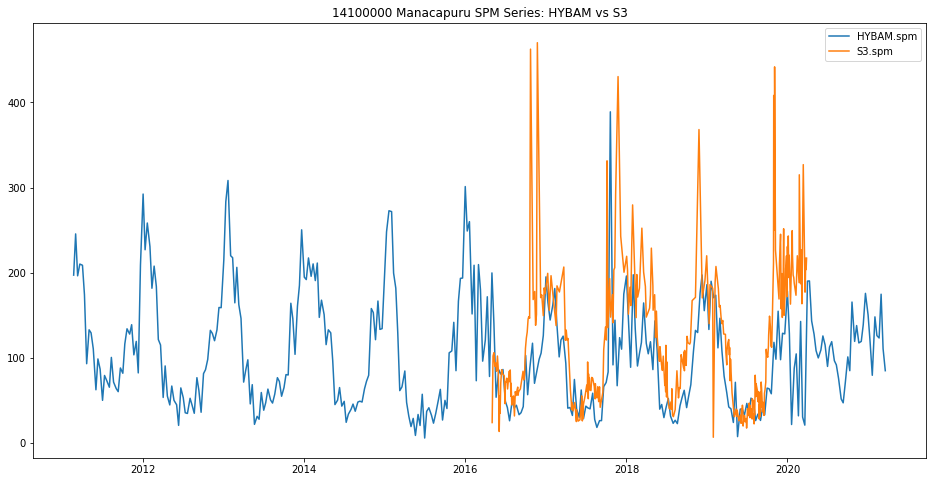

In [14]:
plt.figure(figsize=(16,8))
plt.title('14100000 Manacapuru SPM Series: HYBAM vs S3')
plt.plot(df_manacapuru_sed['pydate'],df_manacapuru_sed['Concentração (mg/L)'],label='HYBAM.spm')
plt.plot(dbs_manacapuru['Date'],dbs_manacapuru['SPM:GET:AMZ'],label='S3.spm')

plt.legend()

## SPM MOD

In [15]:
# concentração = 759,12 * (NIR /RED)^1,92
def SPM_MOD(NIR,RED):
    return 759.12*((NIR/RED)**1.92)

In [16]:
dbs_manacapuru['SPM:MOD'] = SPM_MOD(NIR=dbs_manacapuru['B17-865'], RED=dbs_manacapuru['B8-665'])
dbs_borba['SPM:MOD'] = SPM_MOD(NIR=dbs_borba['B17-865'], RED=dbs_borba['B8-665'])
dbs_obidos['SPM:MOD'] = SPM_MOD(NIR=dbs_obidos['B17-865'], RED=dbs_obidos['B8-665'])

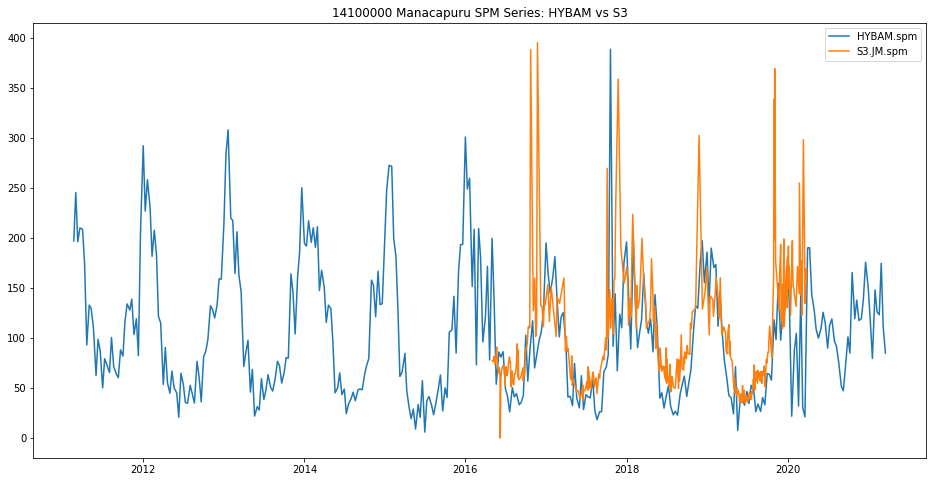

In [17]:
plt.figure(figsize=(16,8))
plt.title('14100000 Manacapuru SPM Series: HYBAM vs S3')
plt.plot(df_manacapuru_sed['pydate'],df_manacapuru_sed['Concentração (mg/L)'],label='HYBAM.spm')
# plt.plot(dbs_manacapuru['Date'],dbs_manacapuru['SPM:GET:AMZ'],label='S3.spm')
plt.plot(dbs_manacapuru['Date'],dbs_manacapuru['SPM:MOD'],label='S3.JM.spm')

plt.legend()

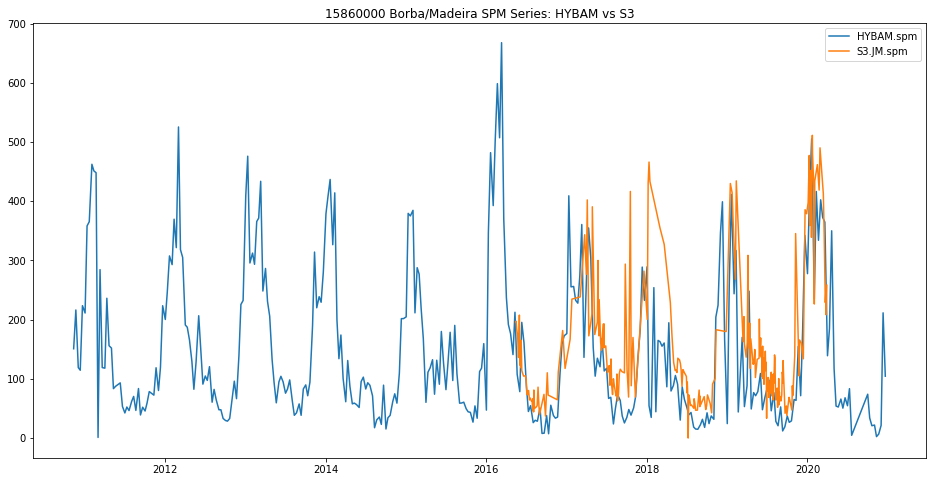

In [63]:
plt.figure(figsize=(16,8))
plt.title('15860000 Borba/Madeira SPM Series: HYBAM vs S3')
plt.plot(df_borba_sed['pydate'],df_borba_sed['Concentração (mg/L)'],label='HYBAM.spm')
plt.plot(dbs_borba['Date'],dbs_borba['SPM:MOD'],label='S3.JM.spm')

plt.legend()

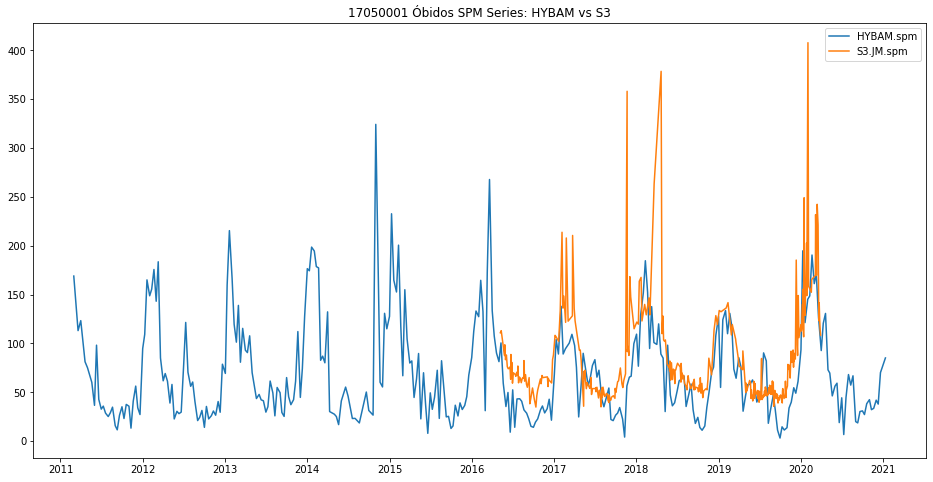

In [64]:
plt.figure(figsize=(16,8))
plt.title('17050001 Óbidos SPM Series: HYBAM vs S3')
plt.plot(df_obidos_sed['pydate'],df_obidos_sed['Concentração (mg/L)'],label='HYBAM.spm')
plt.plot(dbs_obidos['Date'],dbs_obidos['SPM:MOD'],label='S3.JM.spm')

plt.legend()

## SPM MOD+GETAMZ

In [39]:
def SPM_GETAMZ_mod(band665, band865, cutoff_value=0.027, cutoff_delta=0.007, low_params=None, high_params=None, debug=False):
    
    b665 = band665/np.pi
    b865 = band865/np.pi
    
    if debug:
        pdb.set_trace()

    if cutoff_delta == 0:
        transition_coef = np.where(b665<=cutoff_value, 0, 1)

    else:
        transition_range = (cutoff_value - cutoff_delta, cutoff_value + cutoff_delta)
        transition_coef = (b665-transition_range[0])/(transition_range[1]-transition_range[0])

        transition_coef = np.clip(transition_coef, 0, 1)


    # if params are not passed, use default params obtained from the Amazon dataset
    low_params = [2.79101975e+05, 2.34858344e+00, 4.20023206e+00] if low_params is None else low_params
    high_params = [848.97770516,   1.79293191,   8.2788616 ] if high_params is None else high_params

    #low = Fit.power(b665, *low_params).fillna(0)
    #high = Fit.power(b865/b665, *high_params).fillna(0)

    low = power(b665, *low_params).fillna(0)
#     high = power(b865/b665, *high_params).fillna(0)
    high = SPM_MOD(b865,b665)


    spm = (1-transition_coef)*low + transition_coef*high
    return spm

In [40]:
dbs_manacapuru['SPM:AMZMOD'] = SPM_GETAMZ_mod(band865=dbs_manacapuru['B17-865'], band665=dbs_manacapuru['B8-665'])
dbs_borba['SPM:AMZMOD'] = SPM_GETAMZ_mod(band865=dbs_borba['B17-865'], band665=dbs_borba['B8-665'])
dbs_obidos['SPM:AMZMOD'] = SPM_GETAMZ_mod(band865=dbs_obidos['B17-865'], band665=dbs_obidos['B8-665'])

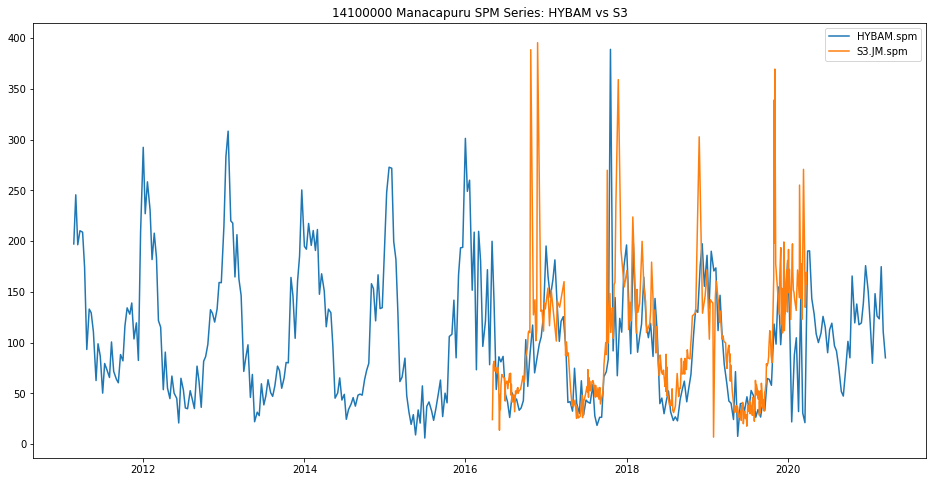

In [55]:
plt.figure(figsize=(16,8))
plt.title('14100000 Manacapuru SPM Series: HYBAM vs S3')
plt.plot(df_manacapuru_sed['pydate'],df_manacapuru_sed['Concentração (mg/L)'],label='HYBAM.spm')
# plt.plot(dbs_manacapuru['Date'],dbs_manacapuru['SPM:GET:AMZ'],label='S3.spm')
plt.plot(dbs_manacapuru['Date'],dbs_manacapuru['SPM:AMZMOD'],label='S3.JM.spm')

plt.legend()

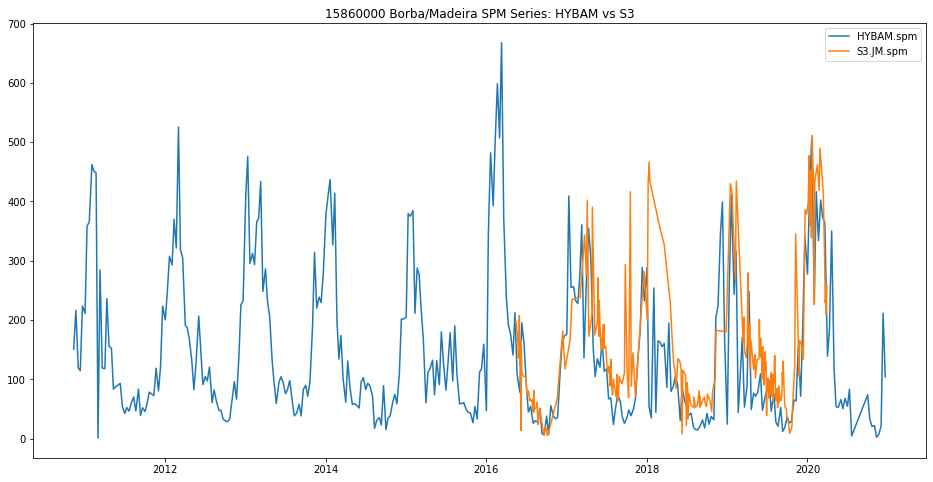

In [70]:
plt.figure(figsize=(16,8))
plt.title('15860000 Borba/Madeira SPM Series: HYBAM vs S3')
plt.plot(df_borba_sed['pydate'],df_borba_sed['Concentração (mg/L)'],label='HYBAM.spm')
plt.plot(dbs_borba['Date'],dbs_borba['SPM:AMZMOD'],label='S3.JM.spm')

plt.legend()

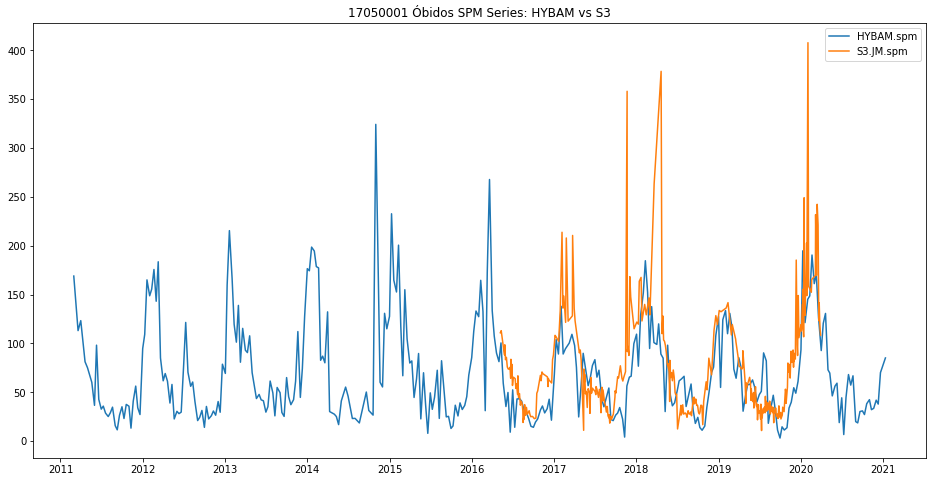

In [71]:
plt.figure(figsize=(16,8))
plt.title('17050001 Óbidos SPM Series: HYBAM vs S3')
plt.plot(df_obidos_sed['pydate'],df_obidos_sed['Concentração (mg/L)'],label='HYBAM.spm')
plt.plot(dbs_obidos['Date'],dbs_obidos['SPM:AMZMOD'],label='S3.JM.spm')

plt.legend()

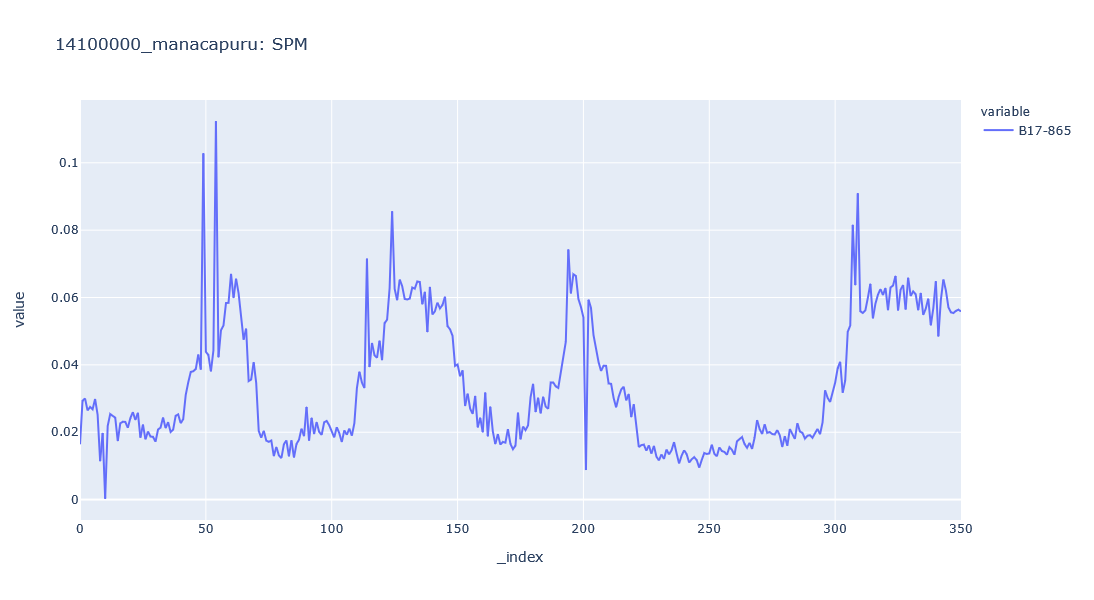

In [120]:
px.line(dbs_manacapuru, y=['B17-865'], height=600, title="14100000_manacapuru: SPM",
        hover_name="Datestr",
        hover_data=['B8-665', 'B21-1020','CAMS','T865:float','A865:float','ABSVLDPX', 'mndwi', 'ndwi'])

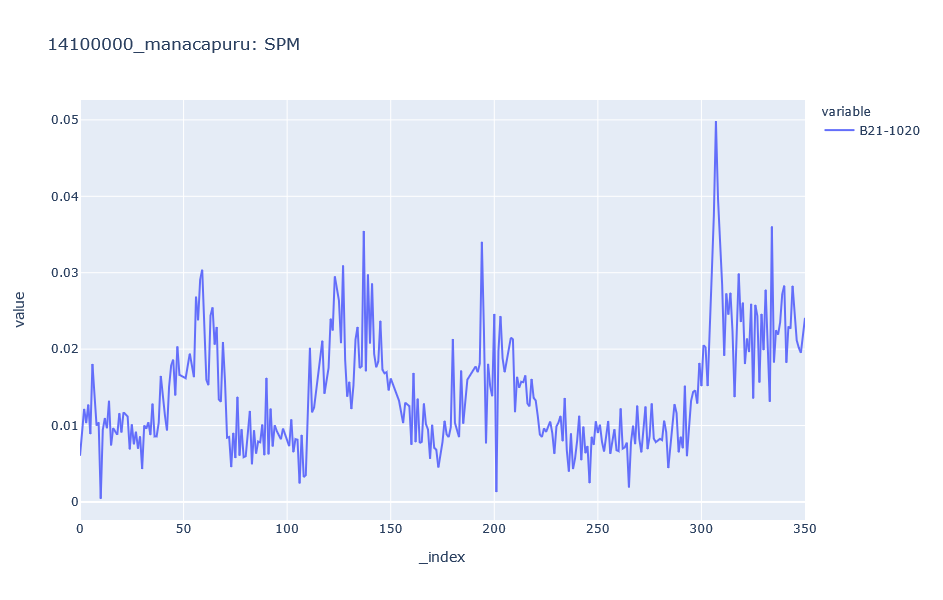

In [65]:
px.line(dbs_manacapuru_filter, y=['B21-1020'], height=600, title="14100000_manacapuru: SPM",
        hover_name="Datestr",
        hover_data=['B8-665', 'B17-865','CAMS','T865:float','A865:float','ABSVLDPX', 'mndwi', 'ndwi'])

## CAMS 2016:2020

In [18]:
camscsvfolder = Path('D:/A1_JM/artigo_SEN3R/2_mat_met/CAMS')

In [19]:
station2cams = [s for s in os.listdir(camscsvfolder) if s.endswith('.csv')]

In [20]:
cams_station_dict = {}
for s in station2cams:
    sname = s.split('.')[0]
    df = pd.read_csv(camscsvfolder/s)
    cams_station_dict[sname] = df

In [21]:
cams_station_dict.keys()

dict_keys(['an1', 'borba_madeira', 'coari', 'fonte_boa', 'itacoatiara', 'manacapuru', 'negro', 'obidos', 'tefe'])

In [23]:
df_cams_manacapuru = cams_station_dict['manacapuru']
df_cams_manacapuru['pydate'] = pd.to_datetime(df_cams_manacapuru['Datetime'])

In [24]:
dbs_manacapuru['Date'] = [t.replace(hour=12) for t in dbs_manacapuru['Date']]    

In [25]:
dbs_manacapuru['CAMS'] = dbs_manacapuru['T865:float']

In [26]:
matchCAMS = []
for i, row in dbs_manacapuru.iterrows():
    match = df_cams_manacapuru[df_cams_manacapuru['pydate'] == row['Date']]
    matchCAMS.append(match.AOD865.values[0])

In [27]:
dbs_manacapuru['CAMS'] = matchCAMS

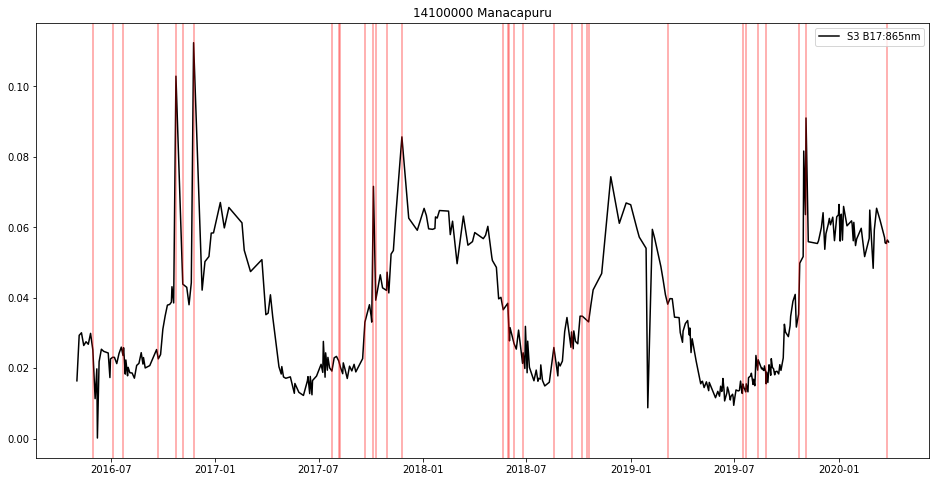

In [42]:
plt.figure(figsize=(16,8))
plt.title('14100000 Manacapuru')
plt.plot(dbs_manacapuru['Date'],dbs_manacapuru['B17-865'],label='S3 B17:865nm',c='k')

for idx, row in dbs_manacapuru.iterrows():
    if row['CAMS'] > row['T865:float']:
        plt.axvline(row['Date'], color='red', alpha=0.4)

# plt.plot(dbs_manacapuru['Date'],dbs_manacapuru['SPM:AMZMOD'],label='SPM:amzmod')
plt.legend()

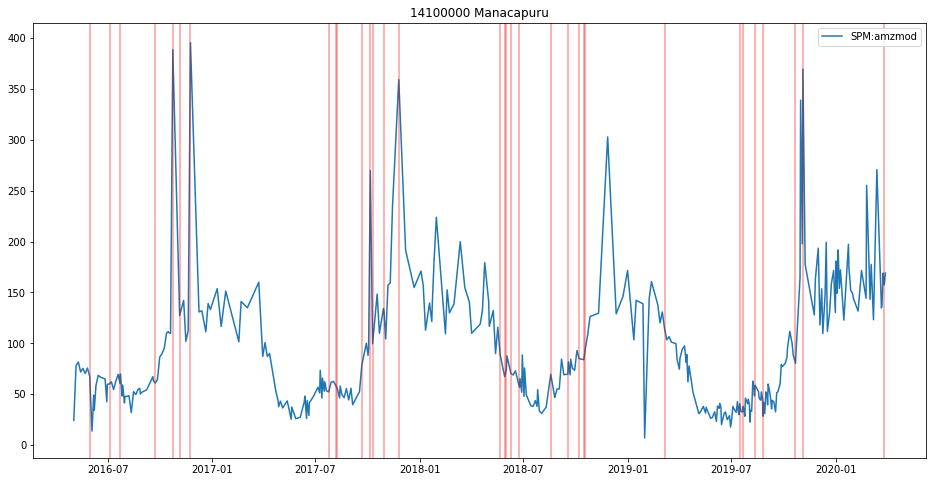

In [43]:
plt.figure(figsize=(16,8))
plt.title('14100000 Manacapuru')
plt.plot(dbs_manacapuru['Date'],dbs_manacapuru['SPM:AMZMOD'],label='SPM:amzmod')
# plt.plot(dbs_manacapuru['Date'],dbs_manacapuru['B17-865'],label='S3 B17:865nm',c='k')

for idx, row in dbs_manacapuru.iterrows():
    if row['CAMS'] > row['T865:float']:
        plt.axvline(row['Date'], color='red', alpha=0.4)


plt.legend()

In [52]:
dbs_manacapuru_filter = dbs_manacapuru[dbs_manacapuru['T865:float'] > dbs_manacapuru['CAMS']].copy()

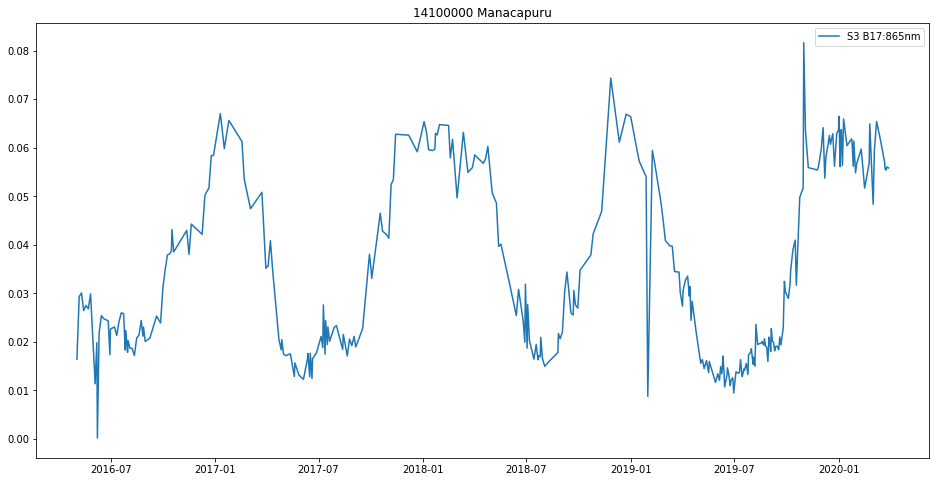

In [53]:
plt.figure(figsize=(16,8))
plt.title('14100000 Manacapuru')
plt.plot(dbs_manacapuru_filter['Date'],dbs_manacapuru_filter['B17-865'], label='S3 B17:865nm')
plt.legend()

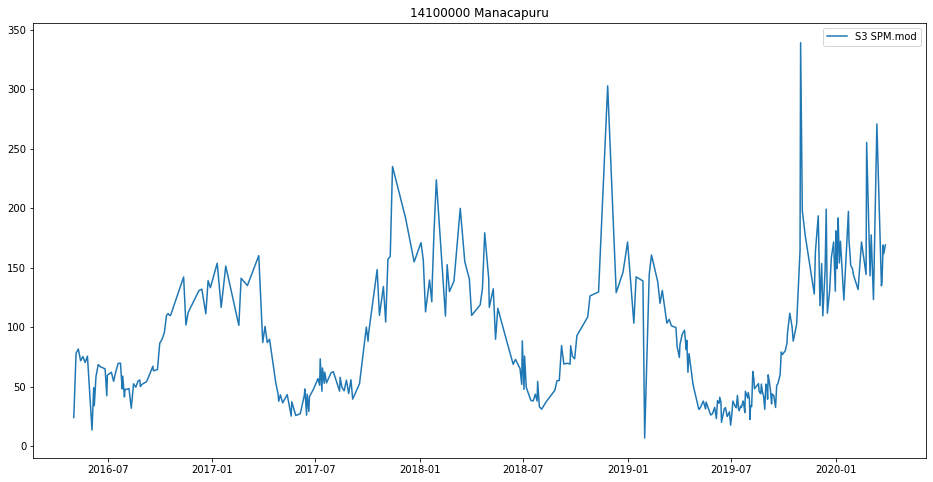

In [54]:
plt.figure(figsize=(16,8))
plt.title('14100000 Manacapuru')
plt.plot(dbs_manacapuru_filter['Date'],dbs_manacapuru_filter['SPM:AMZMOD'], label='S3 SPM.mod')
plt.plot(dbs_manacapuru_filter['Date'],dbs_manacapuru_filter['SPM:AMZMOD'], label='S3 SPM.mod')
plt.legend()

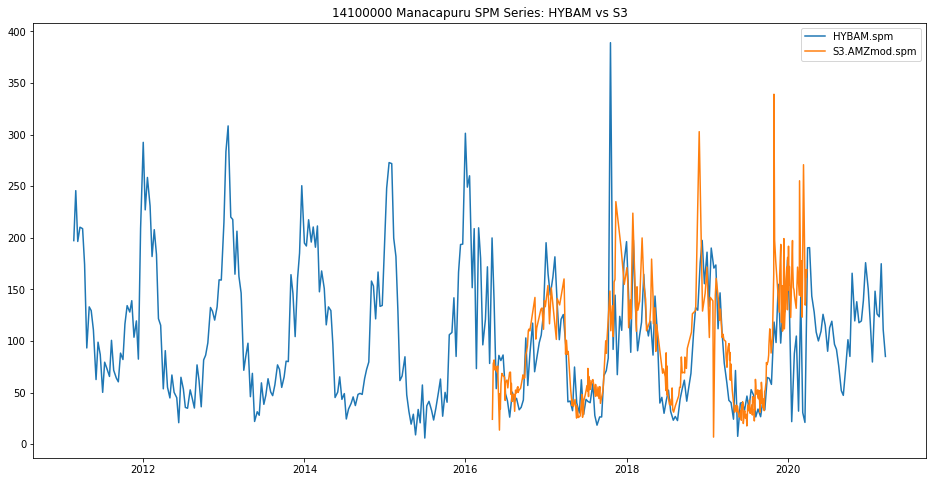

In [62]:
plt.figure(figsize=(16,8))
plt.title('14100000 Manacapuru SPM Series: HYBAM vs S3')
plt.plot(df_manacapuru_sed['pydate'],df_manacapuru_sed['Concentração (mg/L)'],label='HYBAM.spm')
# plt.plot(dbs_manacapuru['Date'],dbs_manacapuru['SPM:GET:AMZ'],label='S3.spm')
plt.plot(dbs_manacapuru_filter['Date'],dbs_manacapuru_filter['SPM:AMZMOD'],label='S3.AMZmod.spm')

plt.legend()